# Майнор по Анализу Данных, Группы ИАД-3 и ИАД-4
## Домашнее задание №3 
## Обо всем понемножку
Задание составлено с использованием материалов А. Шестакова

<hr\>
**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 11 июня 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-X] Фамилия Имя ДЗ-3 **<br\>
X = 3 или 4

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Загрузим файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
random_state = 12345

In [8]:
le = LabelEncoder()

In [9]:
spec_labels = np.array(le.fit_transform(table_data["species"]))

In [35]:
import collections

In [88]:
collections.Counter(spec_labels);

In [10]:
margin = []
shape = []
texture = []
for elem in table_data.columns:
    if "margin" in elem:
        margin.append(elem)
    if "shape" in elem:
        shape.append(elem)
    if "texture" in elem:
        texture.append(elem)

In [11]:
X = table_data[margin + shape + texture].values

In [39]:
y = spec_labels

In [12]:
X.shape

(990, 192)

In [78]:
train_idx = []
test_idx = []

In [117]:
sss = StratifiedShuffleSplit(test_size=0.2,random_state=random_state)

In [118]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_idx = train_index
    test_idx  =  test_index

In [122]:
sorted(y_test);

In [119]:
train_idx.shape

(792,)

In [120]:
test_idx.shape

(198,)

In [126]:
sorted(y_test);

Получили разбиение, требуемое в задании. (Можно проверить посмотрев в sorted(y_test))

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [13]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

In [108]:
img.shape

(357, 700)

In [14]:
filepath

'data/images/33.jpg'

(357, 700)


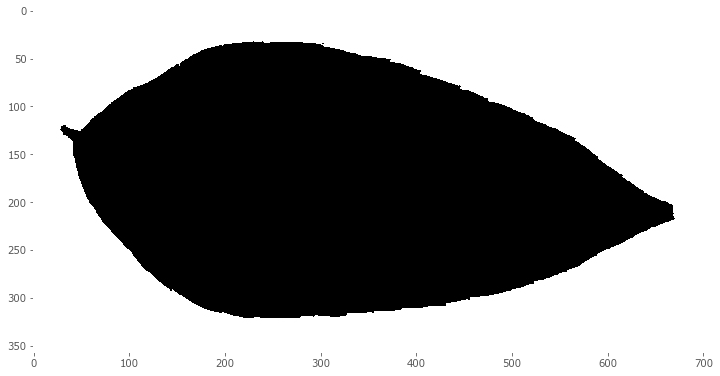

In [15]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [16]:
from scipy.misc import imresize

In [17]:
img_resized = imresize(img, (100, 100))

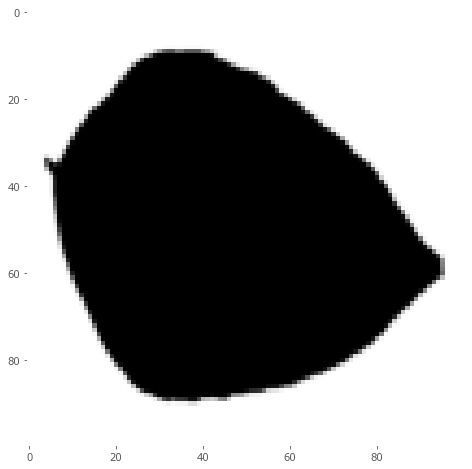

In [18]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [19]:
img_list = []

In [20]:
for file in os.listdir(IMG_DIR):
    file = IMG_DIR + '/' + file
    img_list.append( imresize(plt.imread(file),(100,100)) )

In [21]:
img_pix = []

In [22]:
for i in range(0,len(img_list)):
    img_pix.append(np.ravel(img_list[i]))

In [109]:
img_list[0].shape

(100, 100)

In [128]:
img_list[0][1,1]

0

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

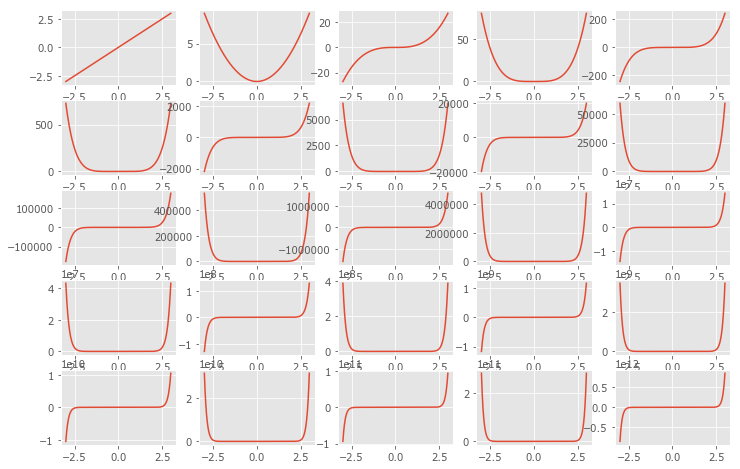

In [155]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    #plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

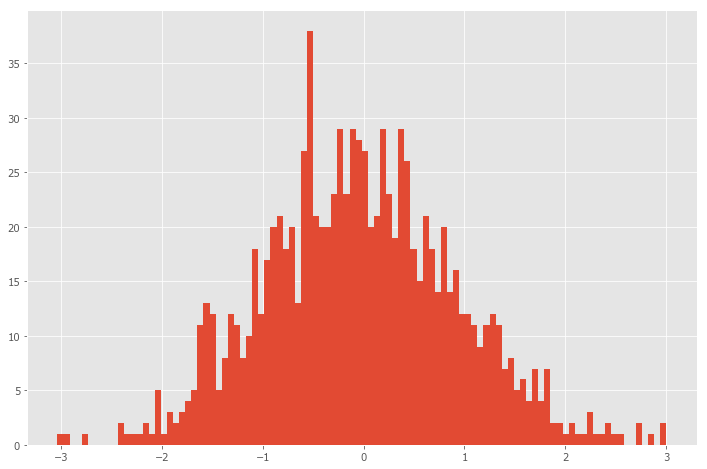

In [24]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них sample, используйте вектоизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

### Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

In [239]:
nimg_list = np.array(img_list)
nimg_pix = np.array(img_pix)

In [242]:
train_img_list = nimg_list[train_idx]

In [25]:
target_ind = []
temp = []
for i in range(0,len(spec_labels)):
    if spec_labels[i] not in temp:
        temp.append(spec_labels[i])
        target_ind.append(i)

In [132]:
sorted(temp); 

In [248]:
target_ind;

В цикле выше нашли индексы 99 разных листьев.

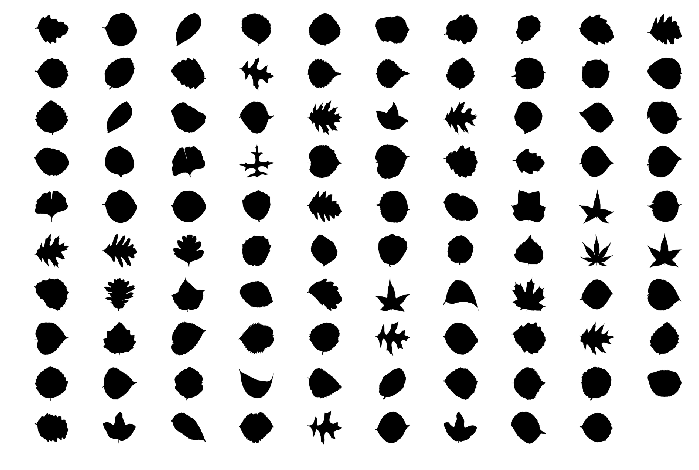

In [156]:
for i in range(1,100):
    plt.subplot(10,10,i)
    plt.imshow(img_list[target_ind[i-1]],cmap="Greys")
    plt.axis("off")

In [141]:
rand_ind = np.random.randint(0,100,200)

In [147]:
rand_ind = rand_ind.reshape(100,2);

В rand_ind записали координаты 100 (т.к. хотим 100 гистограмм) случайных пикселей. 

In [243]:
pixels = []

In [198]:
nimg_list[0][ rand_ind[:,0], rand_ind[:,1] ] #так можно взять значения 100 пикселей с одного изображения

array([  0,   0,   0,   0,   0, 255, 236,   0, 255,   0, 119, 255,  31,
         0,   0, 255, 255,   0,   0, 151,   0,   0,   0, 255,   0,  45,
       255,   0, 255,   0, 255,   0,   0,   0, 255,   4, 255,   0,   0,
         0, 218,   0, 255,   0,   0,   0,   0,   0,   0, 255, 254, 255,
       255, 255, 255,   0, 255, 255, 255, 255,   0,   0,   0, 255,   0,
         0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0, 255,   0,
       255,   0, 255, 255, 255,   0,   0,   0,   0, 255,   0,   0,  17,
         0,   0,   0,   0, 255,   0, 255, 255,   0], dtype=uint8)

In [244]:
for i in range(0,len(train_img_list)):
    pixels.append(train_img_list[i][ rand_ind[:,0], rand_ind[:,1] ])

In [245]:
pixels = np.array(pixels)

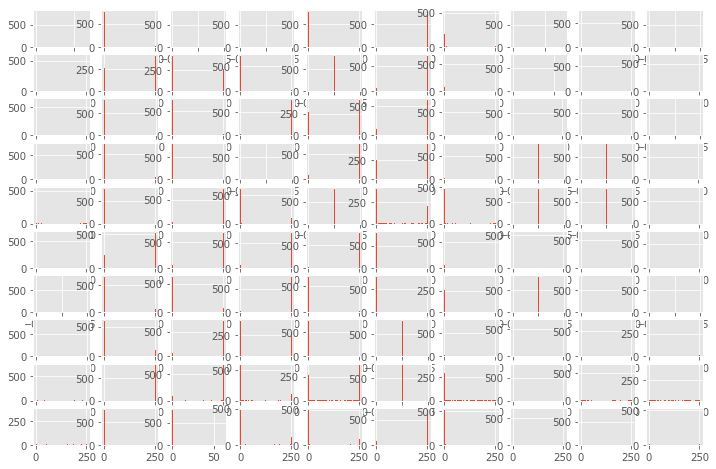

In [246]:
for i in range(1,101):
    plt.subplot(10,10,i)
    _=plt.hist(pixels[:,i-1],bins=100)

На некоторых картинках 0 в центре*

In [264]:
mean_leaf = np.zeros((100,100),dtype=np.int)

In [265]:
for elem in train_img_list:
    mean_leaf +=elem

In [267]:
mean_leaf = mean_leaf/train_img_list.shape[0]

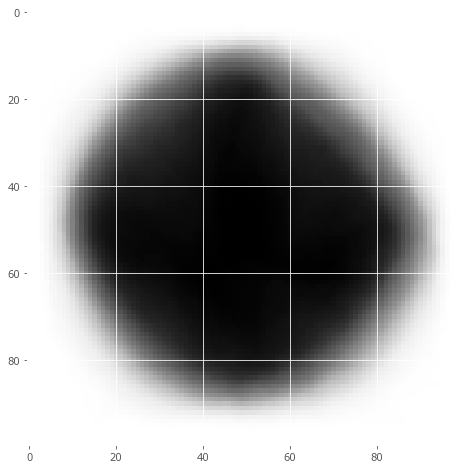

In [284]:
plt.imshow(mean_leaf, cmap = "Greys") #средний лист

In [275]:
pix_dev = np.zeros((100,100))#матрица, в которой будут храниться отклонения пикселей

In [279]:
for i in range(0,100):
    for j in range(0,100):
        pix_dev[i,j] = np.std(train_img_list[:,i,j])

## Стандартное отклонение пикселей

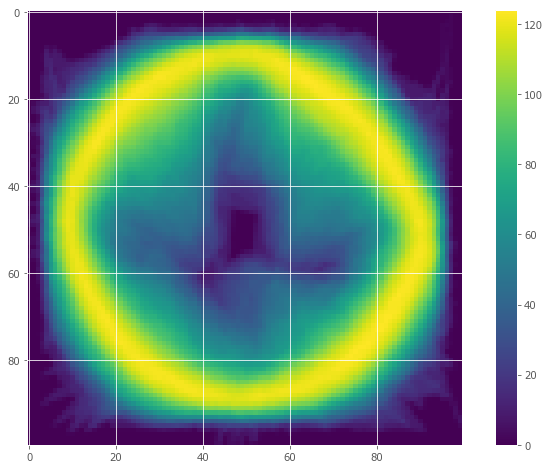

In [281]:
plt.imshow(pix_dev)
plt.colorbar()

Получилась вполне логичная картинка.В центре отклонение минимальное, центры картинок всегда закрашены. На краях отклонение тоже минимальное, на карях изображений листьев всегда пусто. Самое большое отклонение (в области 120) находится там где находится край листа.

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

Ответы: 
* Некоторые классы листьев довольно похожи и визуально отличить их представителей может быть трудно. Листья некоторых классов имеют весьма заметные отличительные черты (нпример листья, у которых много острых концов) и их нетрудно отличит от остальных. Группы похожих классов выделить можно например: 
    гладкие листья![](pic3.png)
    остроконечные![](27n.png)
    с "волнистым" краем ![](3n.png)
    
  
* Признаки в данном случае - цвета (если речь в задании шла об этом), закодированные числом от 0 до 255. Поскольку картинки черно-белые чаще всего (почти всегда) встречаются значения 0 и 255. Распределения похожи, судя по гистограммам большая часть картинки - фон (0), остальное - объект(255)

* Изображения можно бинаризовать, они черно-белые, главная информация на изображени - контур листа, т.е. граница черного и белого цветов, поскольку цвет задается числом от 0 до 255, можно бинаризовать по порогу 127,5 (Хотя учитывая что картинки черно-белые можно брать и другиче числа в этом интервале)

* "Средний" лист не очень похож на лист в привычном понимании этого слова, что не странно, тк мы усреднили большое количество листов разных форм и размеров, таким образом размыв его контур. Довольно много пикселей в середине изображения всегда принимают одно значение, так как в середине изображения - середина листа, она всегда "есть" (листья в внашем случае не проколотые и не кольцевидные), также много "постоянных" пикселей по краям - это фон.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [302]:
from sklearn.manifold import TSNE

In [334]:
from scipy.spatial.distance import minkowski

In [303]:
tsne = TSNE(2)

In [315]:
new_data = tsne.fit_transform(X_train)

In [316]:
new_data.shape

(792, 2)

In [421]:
from scipy.linalg import norm

def minkowski_distance_1(x,y):
    return norm(x-y,1)
 
def minkowski_distance_2(x,y):
    return norm(x-y,2)

def minkowski_distance_inf(x,y):
    return norm(x-y,np.infty)

In [387]:
minkowski_distance_1(X_train[0],X_train[1])

2.5862255599999999

In [388]:
minkowski_distance_2(X_train[0],X_train[1])

0.34109489750268734

In [389]:
minkowski_distance_inf(X_train[20],X_train[69])

0.27441700000000002

In [396]:
tsne1 = TSNE(2,metric=minkowski_distance_1)
tsne2 = TSNE(2,metric=minkowski_distance_2)
tsneinf = TSNE(2,metric=minkowski_distance_inf)

In [413]:
new_data1 = tsne1.fit_transform(X[train_idx])

In [414]:
new_data2 = tsne2.fit_transform(X[train_idx])
new_datainf = tsneinf.fit_transform(X[train_idx])

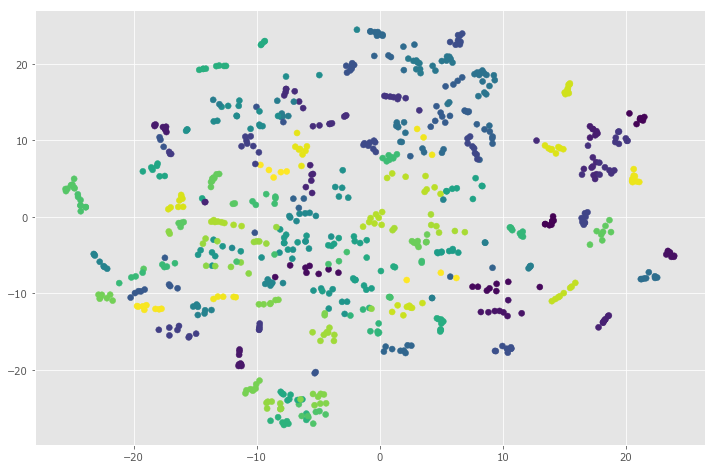

In [416]:
sc1 = plt.scatter(new_data1[:,0],new_data1[:,1],c=y_train,label="some class")

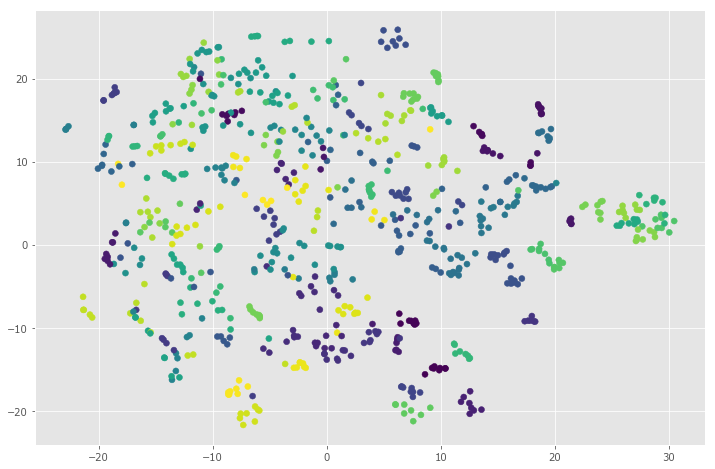

In [417]:
sc2 = plt.scatter(new_data2[:,0],new_data2[:,1],c=y_train,label="some class")

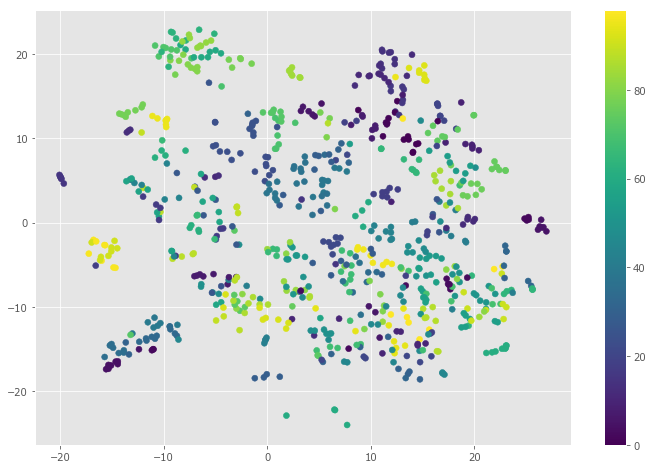

In [423]:
scinf = plt.scatter(new_datainf[:,0],new_datainf[:,1],c=y_train,label="some class")
plt.colorbar()

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распрделение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature_log_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые FR определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы пидумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [30]:
num_components = 2**np.arange(10)

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждог опризнака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [31]:
from sklearn.feature_selection import SelectKBest

Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.